<a href="https://colab.research.google.com/github/daisy-rivera/Project-2/blob/main/Project2_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Average Cost of Undergraduate Student by State (USA)

##Data Description

- This data is posted on Kaggle and was gathered from the National Center for Education Statistics Annual Digest who publishes an annual Digest of Education Statistics report which includes data regarding education in the U.S. 
- It includes information on the average cost of college in the United States, by state and type of institution from 2013 thru 2021.

###Link to datasource [Here](https://www.kaggle.com/datasets/bhargavchirumamilla/average-cost-of-undergraduate-student-by-state-usa)


##Task

- This database will help students predict the average cost for Undergraduate school by state and help them make what is probably one of the biggest investments of their life.

##Import Libraries

In [47]:
# Pandas
import pandas as pd
# Numpy
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

## Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

##Function

In [42]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model', ):
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)
  
  metrics = ['train_MAE','test_MAE', 
             'train_RMSE', 'test_RMSE', 
             'train_R2', 'test_R2']
  
  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),7)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),7)

  ## Output Dataframe
  scores = pd.DataFrame(index=metrics, columns=[f'{model_name}_test'])
  scores.loc[metrics, f'{model_name}_test'] = [train_mae, test_mae,
                                               train_rmse, test_rmse,
                                               train_r2, test_r2]

  return scores

##Import Data

In [4]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
filename = '/content/drive/MyDrive/Coding Dojo/Stack 2 - Machine Learning/08 Wk 8 Boosting/Data Files/average  cost of undergradschool.xlsx'
df = pd.read_excel(filename)

#displaying first 5 rows
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


##Inspecting Data

In [6]:
#verifying how many rows/columns, datatypes, missing items and duplicate rows
print(df.info())
print(('-'*30))
print(f'There are {df.duplicated().sum()} duplicate rows.')
print(('-'*30))
print(f'There are {df.isna().sum().sum()} missing values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB
None
------------------------------
There are 0 duplicate rows.
------------------------------
There are 0 missing values.


In [7]:
#show # of rows & columns
df.shape

print(f'- There are {df.shape[0]} rows, and {df.shape[1]} columns.')

#what rows and columns represent
print(f'- The rows represent {df.shape[0]} students, and the columns represent {df.shape[1]-1} features and 1 target variable.')

- There are 3548 rows, and 6 columns.
- The rows represent 3548 students, and the columns represent 5 features and 1 target variable.


In [8]:
#checking for outliers and impossible values
df.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [9]:
df.describe(exclude='number')

,State,Type,Length,Expense
count,3548,3548,3548,3548
unique,51,3,2,2
top,Alabama,Public Out-of-State,4-year,Fees/Tuition
freq,71,1347,2672,2198


In [10]:
#creating a list of object columns
object_list = list(df.select_dtypes(include='object'))
object_list

['State', 'Type', 'Length', 'Expense']

In [11]:
#looping thru object columns to verify inconsistencies and how many categories in each
for each in object_list:
  print(f'Column Name:{each}')
  print(df[each].value_counts())
  print('\n')


Column Name:State
Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa      

##Data Cleaning

- There are no missing rows and no duplicates.
- All datatypes look correct.
- There are no unusual or outlier values.
- Will treat 'year' column as a categorical value and OneHotEncode it.
- Will OneHotCode all Categorical columns

##Copy of df

In [12]:
#make copy of df for machine learning
mldf = df.copy()

##Exploratory Data Analysis

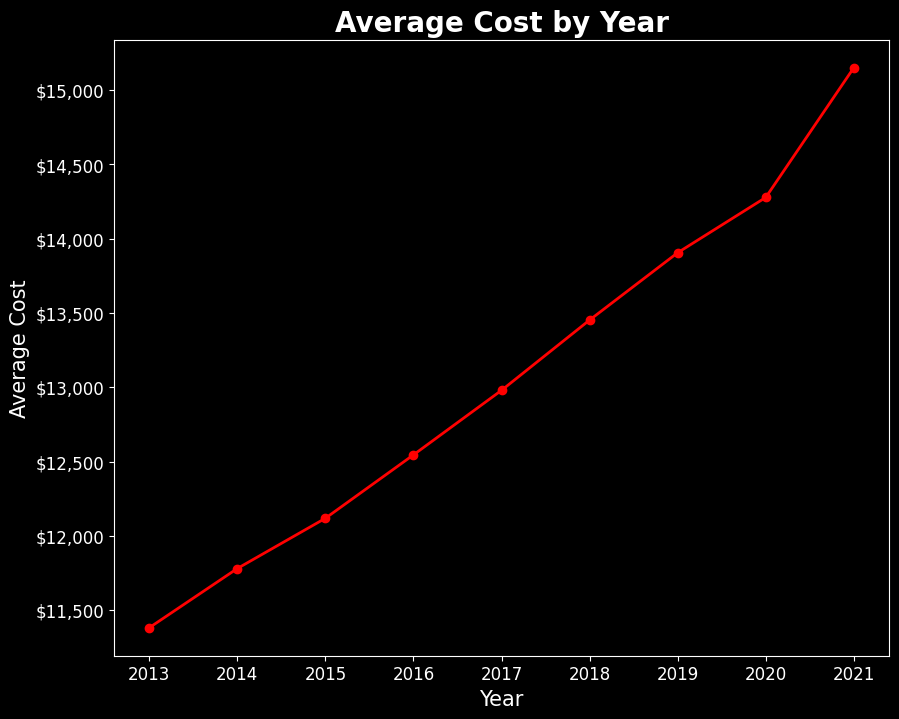

In [13]:
#setting matplotlib style
plt.style.use('dark_background')

#filter for average cost per year
year_average = df.groupby('Year')['Value'].mean().round(2)

#plotting line graph
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(year_average.index, year_average.values, marker='.',linewidth=2, markersize=12, color='red')
plt.title('Average Cost by Year', fontsize=20, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');

> The data clearly shows that the average cost of tuition is increasing year by year. We can confidently conclude that the cost of tuition will continue to rise in the upcoming years.

In [14]:
#creating filter for Yearly cost by expense
year_average_exp = df.groupby(['Year','Expense']).mean().round(2).reset_index()
year_average_exp.head(4)

,Year,Expense,Value
0,2013,Fees/Tuition,12630.67
1,2013,Room/Board,9278.98
2,2014,Fees/Tuition,13087.60
3,2014,Room/Board,9578.55


In [15]:
#creating filter to split Expense by Fees/Tuition and Room/Board
Fee_Tui = year_average_exp['Expense'] == 'Fees/Tuition'
Rm_Brd = year_average_exp['Expense'] == 'Room/Board'
year_fee_tui = year_average_exp[Fee_Tui].groupby('Year')['Value'].mean().round(2)
year_rm_brd = year_average_exp[Rm_Brd].groupby('Year')['Value'].mean().round(2)

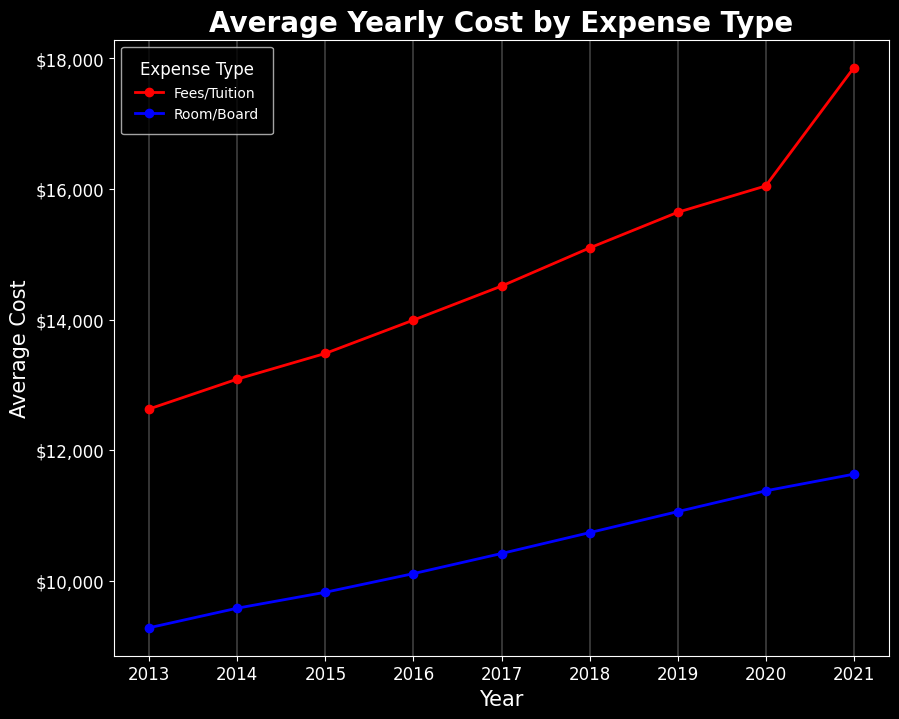

In [16]:
#plotting line graph
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(year_fee_tui.index, year_fee_tui.values, marker='.',linewidth=2, markersize=12, color='red')
plt.plot(year_rm_brd.index, year_rm_brd.values, marker='.',linewidth=2, markersize=12, color='blue')
plt.title('Average Yearly Cost by Expense Type', fontsize=20, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(axis='x',linewidth=.3)
ax.legend(['Fees/Tuition', 'Room/Board'],borderpad=1,title='Expense Type',title_fontsize='large')
ax.yaxis.set_major_formatter('${x:,.0f}');

> This graph shows the average cost increase since 2013 by Expense Type. Both expenses are rising year over year. We can see that from 2020 to 2021, the cost of Fees/Tuition had a higher spike increase than in prior years.

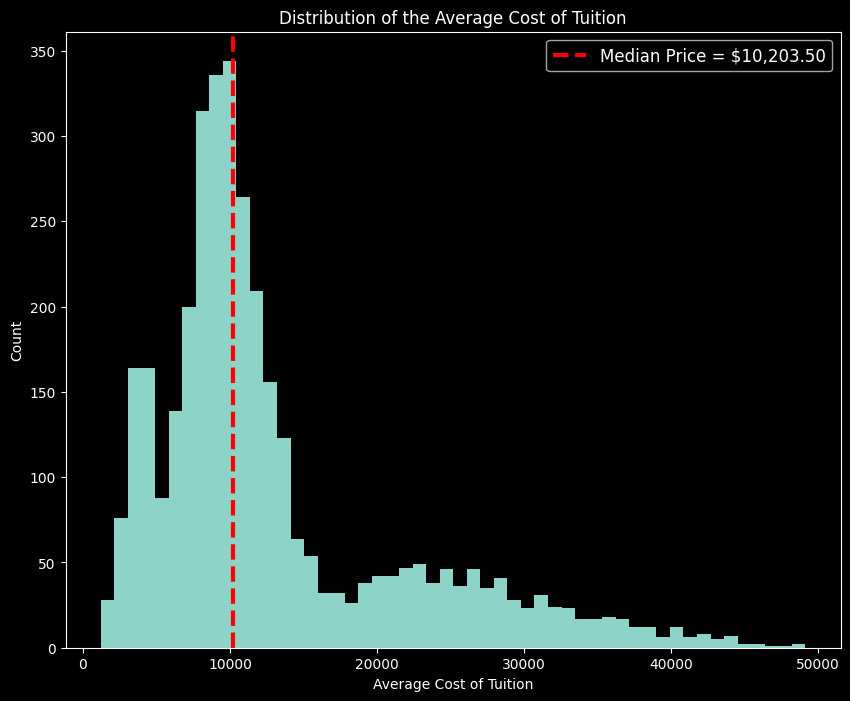

In [17]:
#setting the figure size
fig, ax = plt.subplots(figsize = (10,8))

#creating the histogram
ax.hist(df['Value'], bins = 'auto'); 

#customizing the graph
plt.xlabel('Average Cost of Tuition')
plt.ylabel('Count')
plt.title('Distribution of the Average Cost of Tuition')

#creating a median line on the graph
median = df['Value'].median().round(2) # getting the median line

#code to add line and customize it on the graph
plt.axvline(median, color = 'red', ls = '--', label = f'Median Price = ${median:,.2f}',lw=3)
plt.legend(fontsize=12,loc='upper right');


> We can see that the majority of the students in this dataset had an average cost of tuition of around $8-12K.

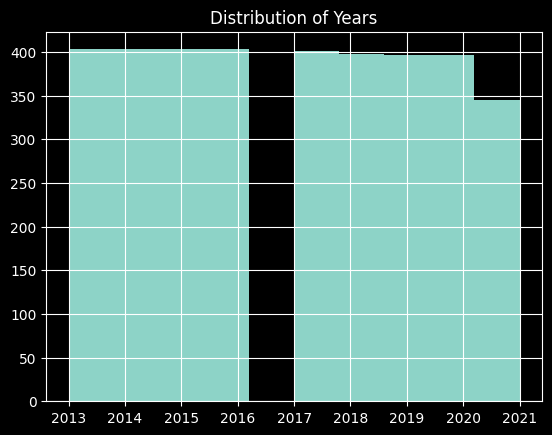

In [18]:
#distribution of years
df['Year'].hist()
plt.title('Distribution of Years');

> The distribution of years is pretty balanced.


 State 



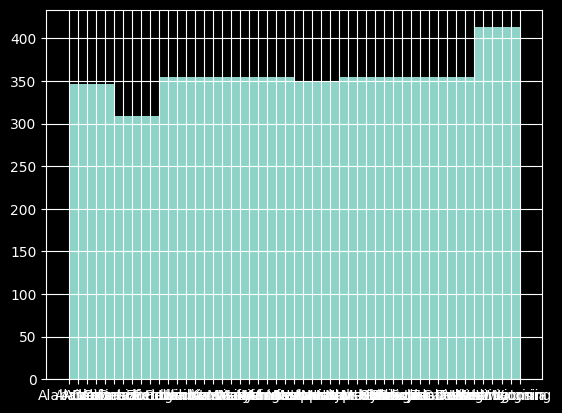


 Type 



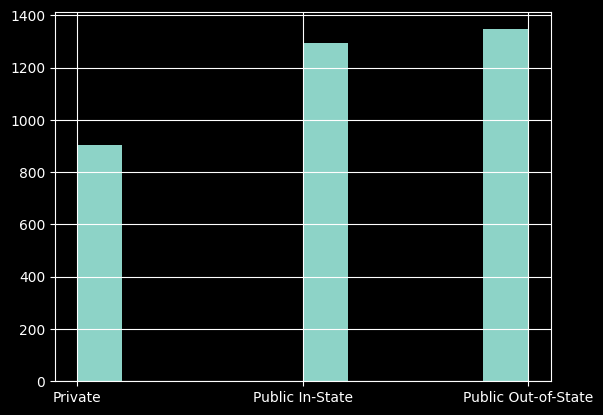


 Length 



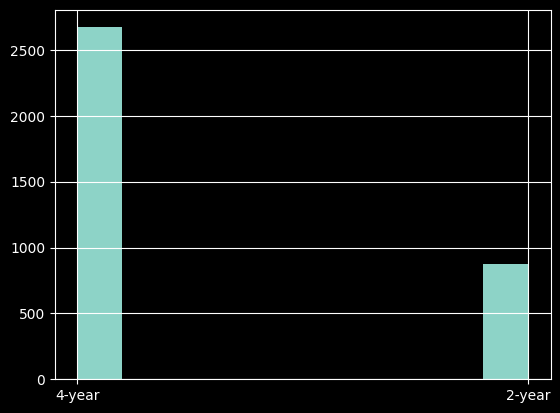


 Expense 



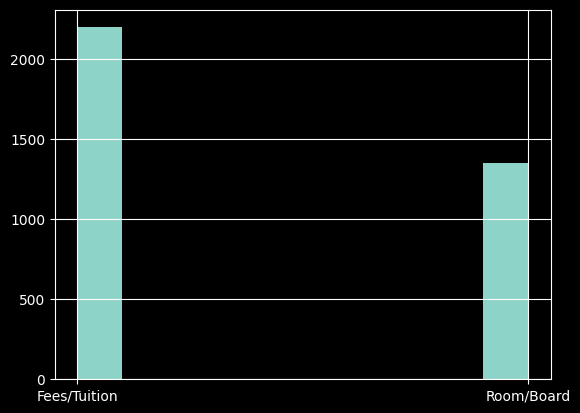

In [19]:
#Checking distribution for object columns
for col in df.select_dtypes('object'):
  print('\n',col,'\n')
  df[col].hist()
  plt.show()

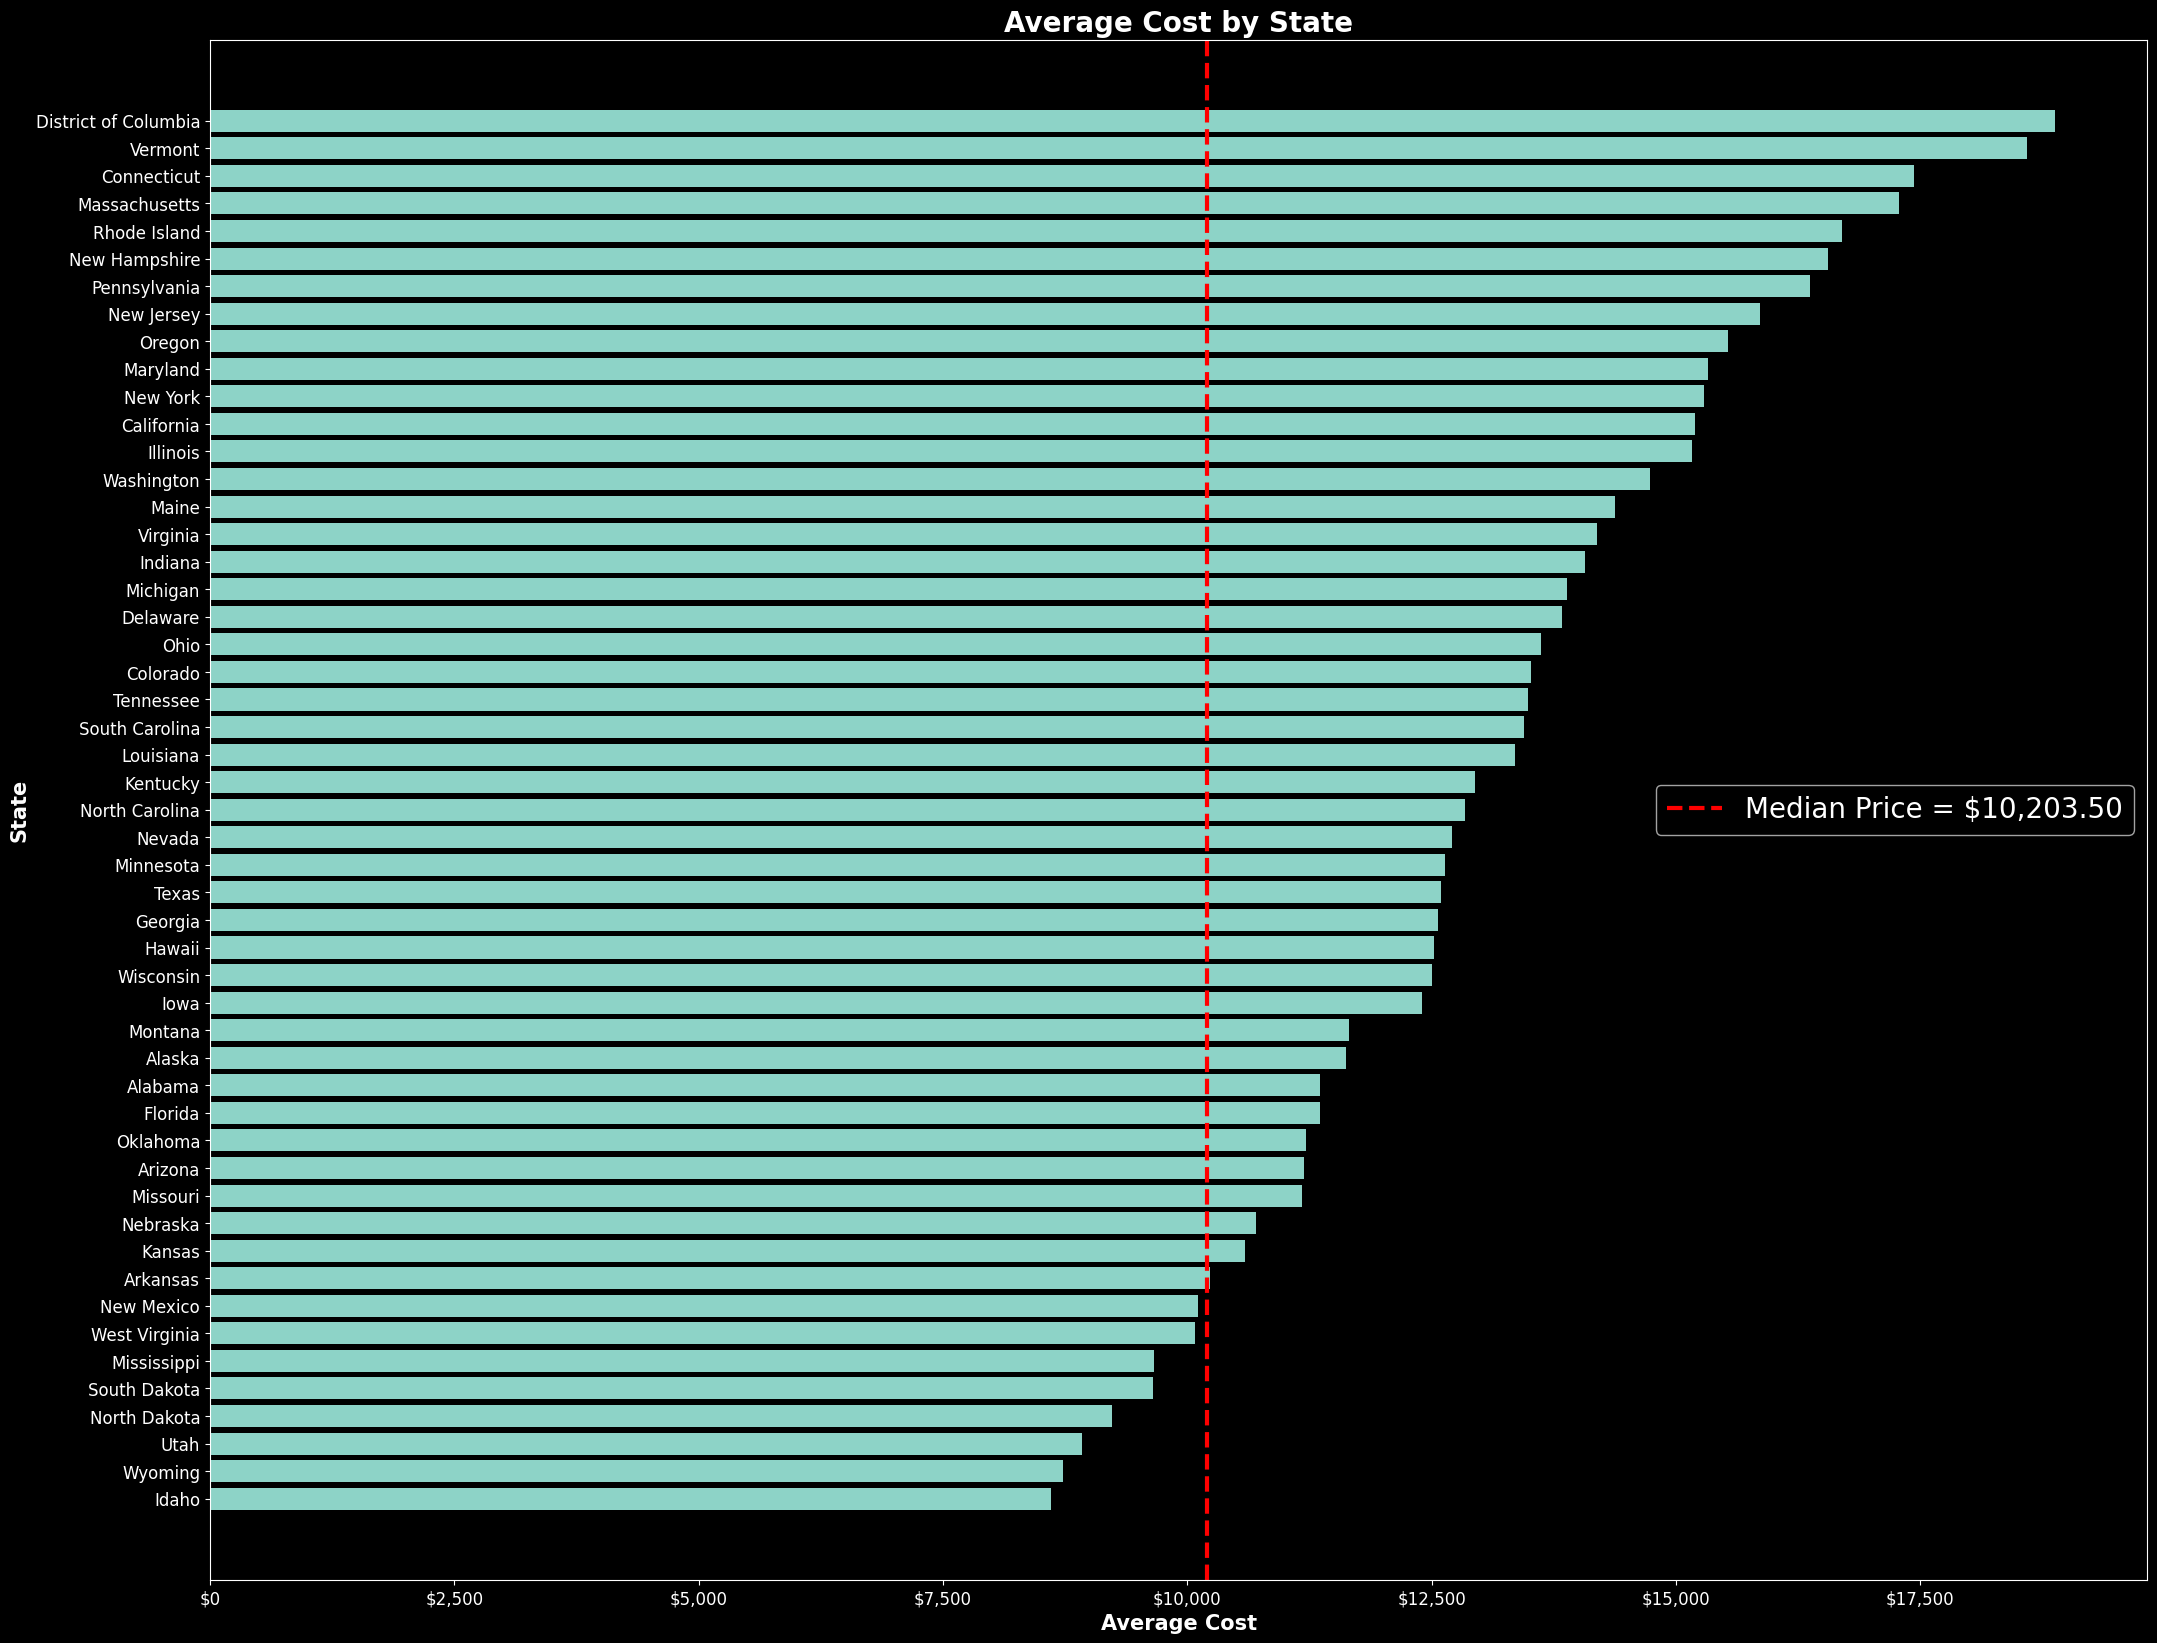

In [20]:
#filtering and sorting average cost by state
state_value = df.groupby('State')['Value'].mean().sort_values()

#plotting bar graph
fig, ax = plt.subplots(figsize=(25,20))
plt.barh(state_value.index, state_value.values)
plt.title('Average Cost by State', fontsize=20, fontweight='bold')
plt.ylabel('State',fontsize=15,fontweight='bold')
plt.xlabel('Average Cost',fontsize=15,fontweight='bold')
plt.xticks(size=12)
plt.yticks(size=12)
ax.xaxis.set_major_formatter('${x:,.0f}');

#code to add line and customize it on the graph
plt.axvline(median, color = 'red', ls = '--', label = f'Median Price = ${median:,.2f}',lw=3)

plt.legend(fontsize=20,loc='center right');


> When we plot the average cost by state, we can see that the majority of the states are above the Median cost. Only 8 states have an average tuition below the Median cost. The 5 

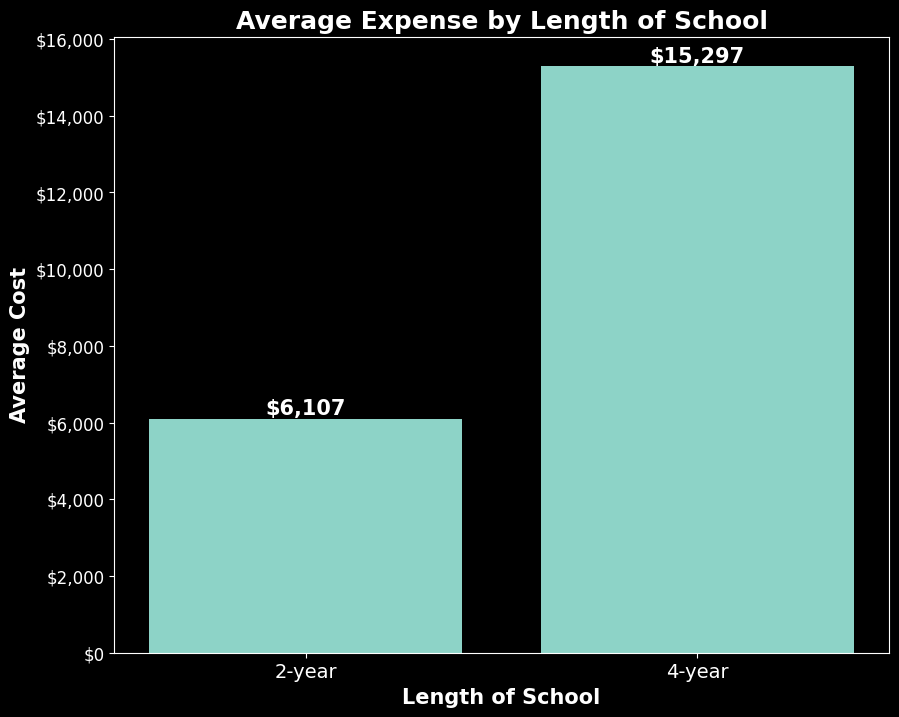

In [21]:
#filter for average cost by expense category
lengh_type = exp_type = df.groupby('Length')['Value'].mean()

#plotting bar graph
fig, ax = plt.subplots(figsize=(10,8))
exp_container = ax.bar(lengh_type.index, lengh_type.values)
ax.bar_label(exp_container, fmt='${:,.0f}',size=15, color='white', fontweight='bold')
plt.title('Average Expense by Length of School', fontsize=18, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15,fontweight='bold')
plt.xlabel('Length of School',fontsize=15,fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');

> The average cost of a 4-year tuition is slightly more than double of a 2-year tuition. 

In [22]:
#creating filters for length 
df2y = df[df['Length'] == "2-year"]
df4y = df[df['Length'] == "4-year"]

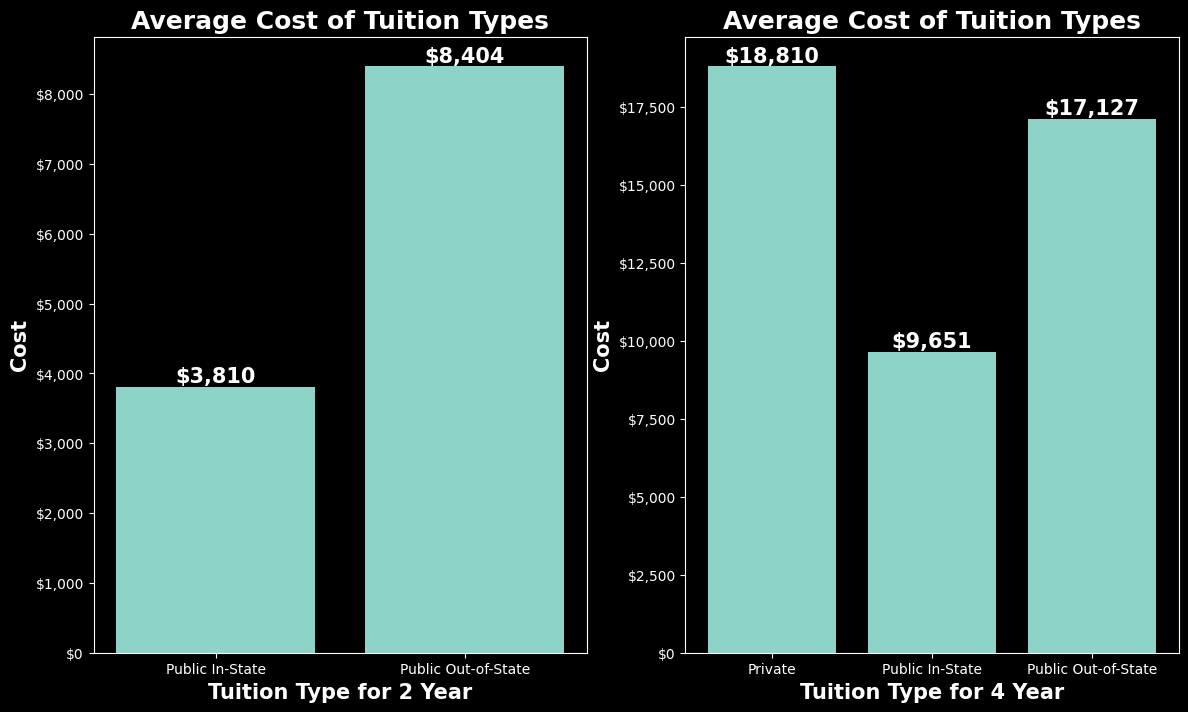

In [23]:
# #filter for average cost by expense category
type = df2y.groupby('Type')['Value'].mean()
type2 = df4y.groupby('Type')['Value'].mean()


#plotting bar graph
fig, ax = plt.subplots(1,2,figsize=(14,8))
type_container = ax[0].bar(type.index, type.values)
type2_container = ax[1].bar(type2.index, type2.values)
ax[0].bar_label(type_container,size=15, color='white', fontweight='bold',fmt='${:,.0f}')
ax[1].bar_label(type2_container,size=15, color='white', fontweight='bold',fmt='${:,.0f}')

ax[0].set_title('Average Cost of Tuition Types', fontsize=18, fontweight='bold')
ax[0].set_ylabel('Cost',fontsize=15,fontweight='bold')
ax[0].set_xlabel('Tuition Type for 2 Year',fontsize=15,fontweight='bold')
ax[0].yaxis.set_major_formatter('${x:,.0f}');

ax[1].set_title('Average Cost of Tuition Types', fontsize=18, fontweight='bold')
ax[1].set_ylabel('Cost',fontsize=15,fontweight='bold')
ax[1].set_xlabel('Tuition Type for 4 Year',fontsize=15,fontweight='bold')
ax[1].yaxis.set_major_formatter('${x:,.0f}');

> This database has a much higher count for Public Undergrad tuitions verses Private but either way it is clear that Public In-State is the most economic type of tuition. There is no Private tuition reported for 2-year length.

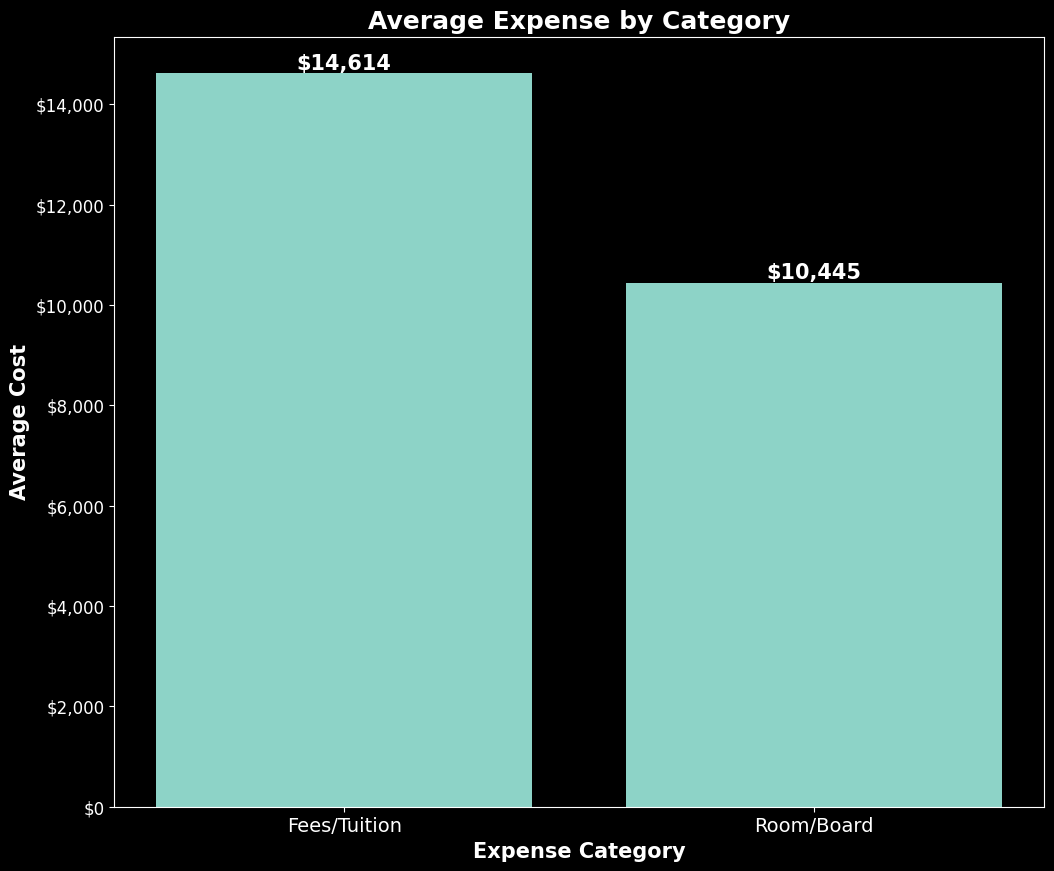

In [24]:
#filter for average cost by expense category
exp_type = df.groupby('Expense')['Value'].mean()

#plotting bar graph
fig, ax = plt.subplots(figsize=(12,10))
exp_container = ax.bar(exp_type.index, exp_type.values)
ax.bar_label(exp_container, fmt='${:,.0f}',size=15, color='white', fontweight='bold')
plt.title('Average Expense by Category', fontsize=18, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15,fontweight='bold')
plt.xlabel('Expense Category',fontsize=15,fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');

> The average expense by category shows that Room/Board is only slightly lower than the Fees/Tuition meaning that the total cost of tuition is largely split between the two expenses.

In [25]:
Tuition_ExpType = df.groupby(['Type','Expense']).mean().reset_index()
Tuition_ExpType = Tuition_ExpType.sort_values(by = 'Value')
Tuition_ExpType

,Type,Expense,Year,Value
2,Public In-State,Fees/Tuition,2016.724586,6317.919622
3,Public In-State,Room/Board,2017.000000,10231.495556
5,Public Out-of-State,Room/Board,2017.000000,10231.495556
1,Private,Room/Board,2017.000000,10871.720000
4,Public Out-of-State,Fees/Tuition,2016.967670,16327.268673
0,Private,Fees/Tuition,2016.978022,26662.002198


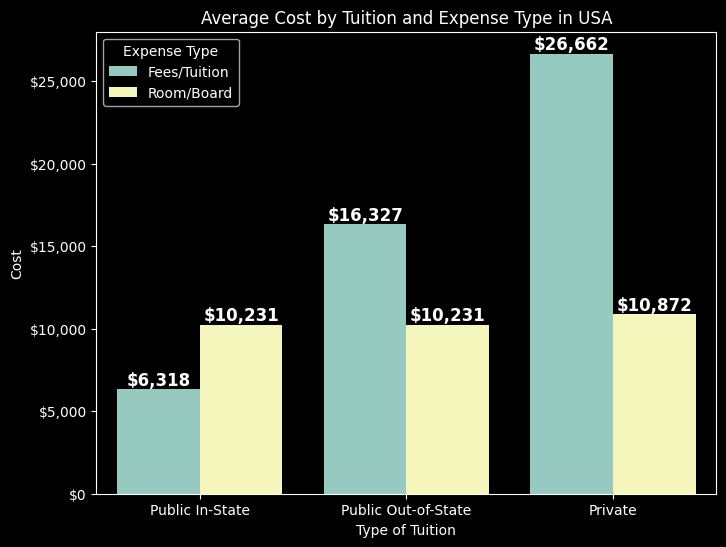

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(data = Tuition_ExpType, x = 'Type', y = 'Value', hue = 'Expense')
plt.bar_label(ax.containers[0], fmt='${:,.0f}',size=12, color='white', fontweight='bold')
plt.bar_label(ax.containers[1], fmt='${:,.0f}',size=12, color='white', fontweight='bold')

plt.title('Average Cost by Tuition and Expense Type in USA')
plt.ylabel('Cost')
plt.xlabel('Type of Tuition')
ax.yaxis.set_major_formatter('${x:,.0f}');
plt.legend(title='Expense Type');




- This graph shows the expense by type (Fees/Tuition vs Room/Board) by the type of Tuition (Public In-State, Public Out-of-State or Private). We can see by this graph that Room/Board costs are pretty similar for all types of Tuition. It is the Fees/Tuition expenses that largely differ based on the Type of Tuition.

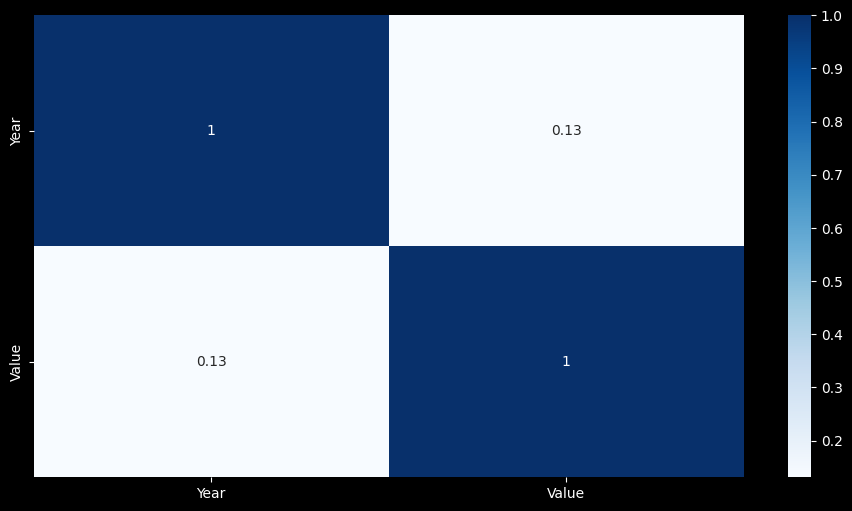

In [27]:
#creating a heat map
plt.figure(figsize=(11.45,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

- There are no correlations between my two numeric columns. I only the year column and my target column which is the Value.

In [28]:
#Filter for Top5
DisC = df['State'] == 'District of Columbia'
Ver = df['State'] == 'Vermont'
Mass = df['State'] == 'Massachusetts'
Conn = df['State'] == 'Connecticut'
RI = df['State'] == 'Rhode Island'

Top5 = (df[(DisC) | (Ver)| (Mass)| (Conn)| (RI)])
Top5_ExpType = Top5.groupby(['State','Expense']).mean().reset_index()
Top5_ExpType = Top5_ExpType.sort_values(by = 'Value')
Top5_ExpType

,State,Expense,Year,Value
9,Vermont,Room/Board,2017.000000,11884.740741
7,Rhode Island,Room/Board,2017.000000,12482.888889
1,Connecticut,Room/Board,2017.000000,13107.740741
5,Massachusetts,Room/Board,2017.000000,13151.555556
3,District of Columbia,Room/Board,2017.000000,15062.000000
6,Rhode Island,Fees/Tuition,2016.909091,19290.227273
4,Massachusetts,Fees/Tuition,2016.909091,19816.750000
0,Connecticut,Fees/Tuition,2016.909091,20090.704545
2,District of Columbia,Fees/Tuition,2016.846154,20201.884615
8,Vermont,Fees/Tuition,2016.909091,22715.068182


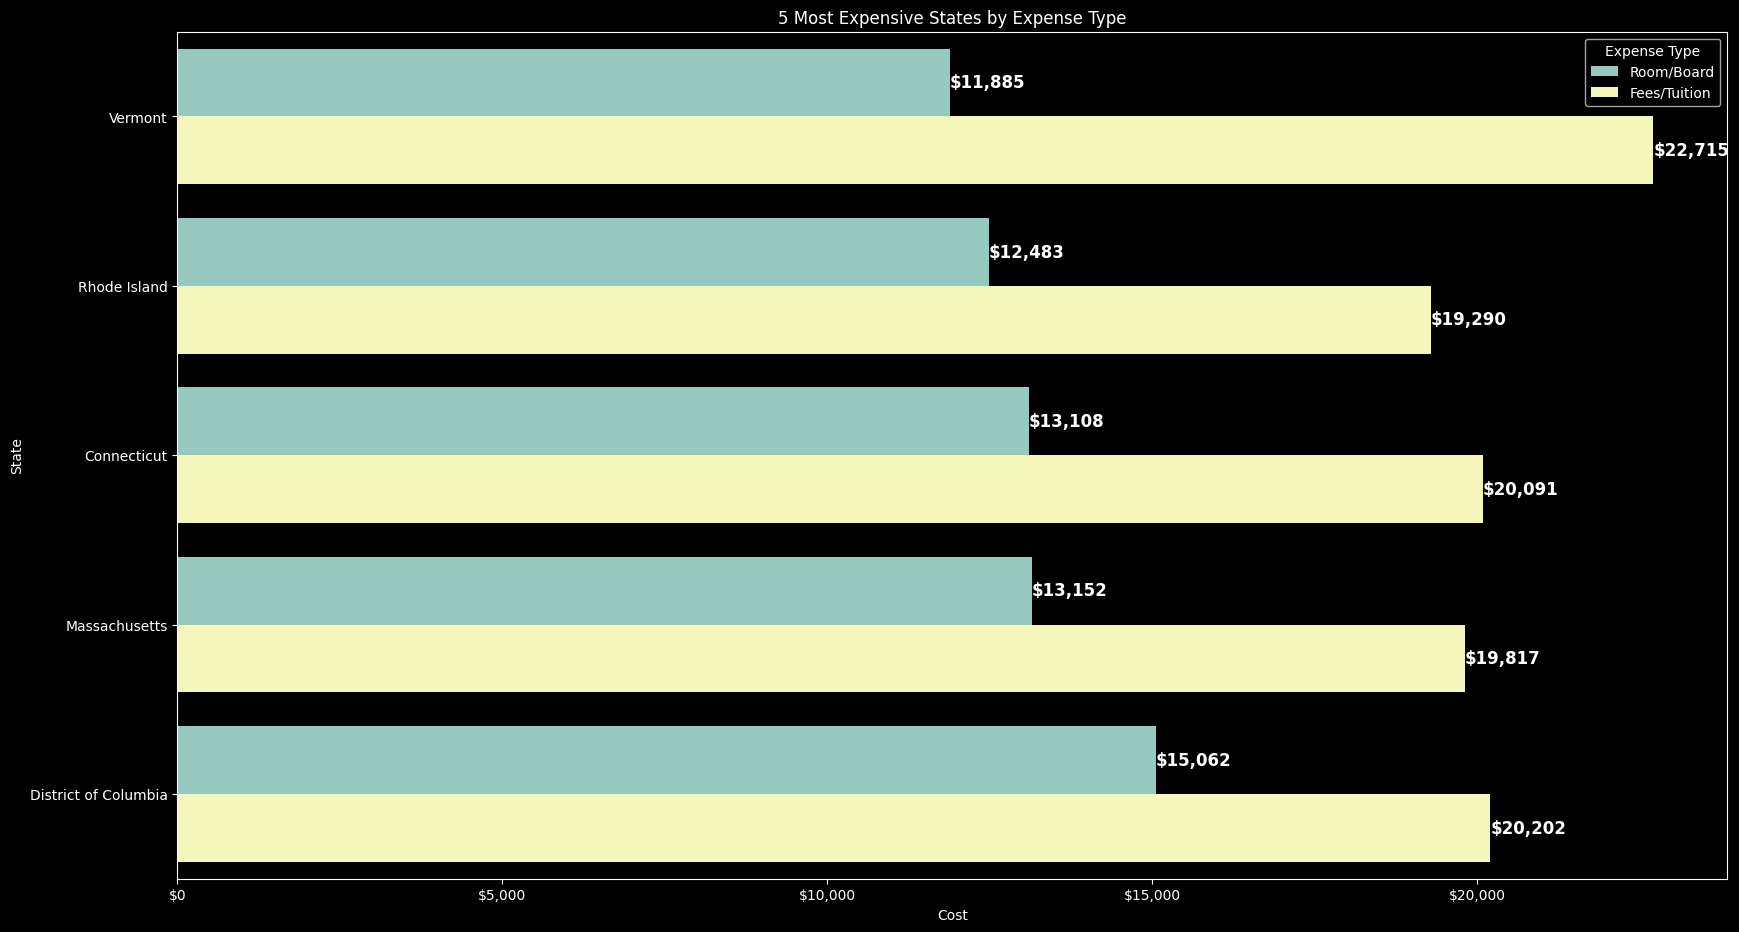

In [38]:
#plotting top 5
fig, ax = plt.subplots(figsize=(20,11))
ax = sns.barplot(data = Top5_ExpType, x = 'Value', y = 'State', hue = 'Expense')
plt.bar_label(ax.containers[1], fmt='${:,.0f}',size=12, color='white', fontweight='bold')
plt.bar_label(ax.containers[0], fmt='${:,.0f}',size=12, color='white', fontweight='bold')

plt.title('5 Most Expensive States by Expense Type')
plt.ylabel('State')
plt.xlabel('Cost')
ax.xaxis.set_major_formatter('${x:,.0f}');
plt.grid(visible=False)
plt.legend(title='Expense Type',loc='upper right');


In [29]:
#Filter for Bottom 5
Ida = df['State'] == 'Idaho'
Wy = df['State'] == 'Wyoming'
ND = df['State'] == 'North Dakota'
SD = df['State'] == 'South Dakota'
Ut = df['State'] == 'Utah'

Bot5 = (df[(Ida) | (Wy)| (ND)| (SD)| (Ut)])
Bot5_ExpType = Bot5.groupby(['State','Expense']).mean().reset_index()
Bot5_ExpType = Bot5_ExpType.sort_values(by = 'Value')


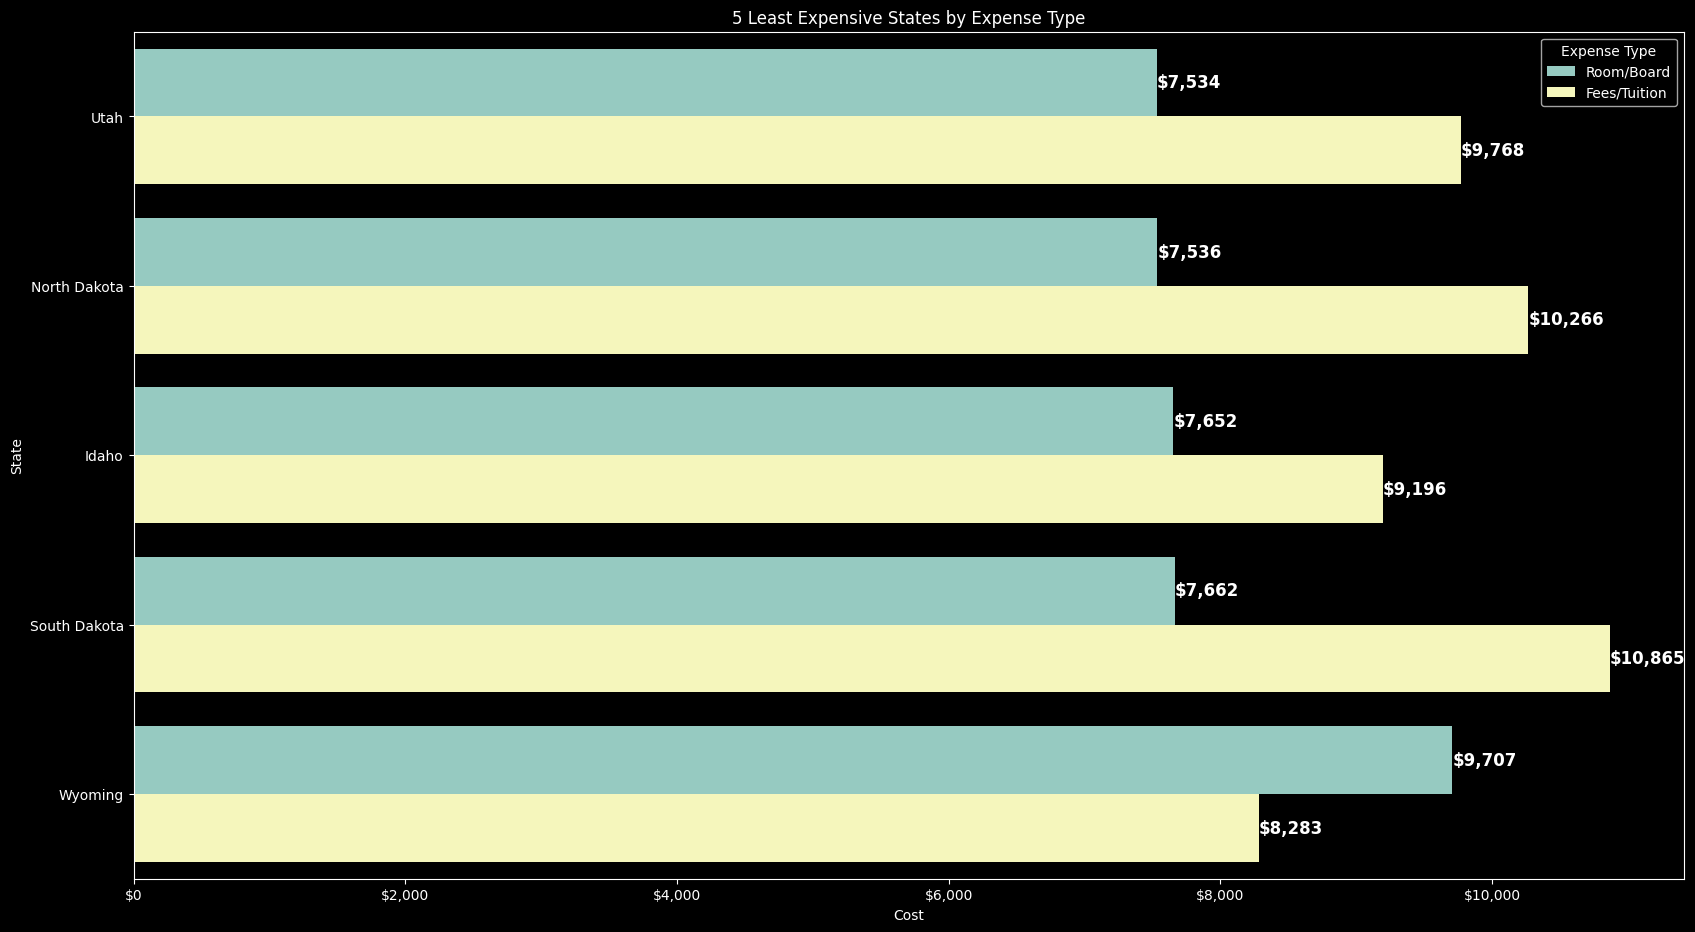

In [39]:
#plotting cheapest 5
fig, ax = plt.subplots(figsize=(20,11))
ax = sns.barplot(data = Bot5_ExpType, x = 'Value', y = 'State', hue = 'Expense')
plt.bar_label(ax.containers[1], fmt='${:,.0f}',size=12, color='white', fontweight='bold')
plt.bar_label(ax.containers[0], fmt='${:,.0f}',size=12, color='white', fontweight='bold')

plt.title('5 Least Expensive States by Expense Type')
plt.ylabel('State')
plt.xlabel('Cost')
ax.xaxis.set_major_formatter('${x:,.0f}');
plt.grid(visible=False)
plt.legend(title='Expense Type',loc='upper right');

#Data Validation Split

###Assigning values for Features(X) and Target(y)

In [31]:
#assign X and y 
X = df.drop(columns='Value')
y = df['Value']

###Splitting data into Training and Testing datasets

In [32]:
#splitting data into training and testing datasets (using stratify to help balance split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Create Preprocessor

In [33]:
#instantiating scaler
scaler = StandardScaler()
ohe = OneHotEncoder()

In [34]:
#create category columns
num_col = make_column_selector(dtype_include="number")
cat_col = make_column_selector(dtype_include="object")

#create column tuples
num_tup = (scaler,num_col)
cat_tup = (ohe,cat_col)

#create column transformer
processor = make_column_transformer(num_tup, cat_tup, remainder="drop")

#XGB Boost Model

##Base Model

###Instantiate and Create Model Pipeline

In [35]:
#instantiating model
xgb = XGBRegressor()

#create model pipe
xgb_pipe = make_pipeline(processor,xgb)

###Fit Model

In [36]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, b...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

###Evaluate Model

In [43]:
#evaluating model performance metrics using a function
xgb_scores = model_metrics(xgb_pipe, X_train, y_train, X_test, y_test, model_name='XGB Boost')

In [44]:
xgb_scores

,XGB Boost_test
train_MAE,427.2049
test_MAE,685.8363
train_RMSE,707.025
test_RMSE,1145.6944
train_R2,0.993514
test_R2,0.982217


###Tune Model

In [45]:
#getting hyperparameters for pipeline
xgb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                   ('onehotencoder', OneHotEncoder(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_dep

In [51]:
#creating parameter grid to test
xgbparam_grid = { 'xgbregressor__n_estimators': [10,50,100,150],
              'xgbregressor__max_depth': ['None',2,4]}

In [52]:
#creating grid search
xgb_gs = GridSearchCV(xgb_pipe, xgbparam_grid)

In [53]:
#fitting grid search
xgb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
                                       ('xgbregressor',
                                        XGBRegr...
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             param_grid={'xgbregressor__max_depth': ['None', 2, 4],
                         'xgbregressor__n_estimators': [10, 50, 100, 150]})

In [54]:
#displaying best parameters
xgb_gs.best_params_

{'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 150}

##Tuned XGBoost Model

###Instantiate and Create Model Pipeline

In [55]:
#instantiating model
tuned_xgb = XGBRegressor(max_depth=4,n_estimators=150)

#create model pipe
tuned_xgb_pipe = make_pipeline(processor,tuned_xgb)

###Fit Model

In [56]:
tuned_xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, b...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=150,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

###Evaluate Tuned Model

In [57]:
#evaluating model performance metrics using a function
tuned_xgb_scores = model_metrics(tuned_xgb_pipe, X_train, y_train, X_test, y_test, model_name='Tuned XGB Boost')

In [58]:
tuned_xgb_scores

,Tuned XGB Boost_test
train_MAE,730.8988
test_MAE,936.7147
train_RMSE,1142.3622
test_RMSE,1459.9661
train_R2,0.983066
test_R2,0.971124


> The XGBoost Model performed better prior to tuning.

#Linear Regression Model

##Base Model

###Instantiate and Create Model Pipeline

In [59]:
#instantiating model
lreg = LinearRegression()

#create model pipe
lreg_pipe = make_pipeline(processor,lreg)

###Fit Model

In [60]:
lreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
                ('linearregression', LinearRegression())])

###Evaluate Model

In [66]:
#evaluating model performance metrics using a function
lreg_scores = model_metrics(lreg_pipe, X_train, y_train, X_test, y_test, model_name='Linear Regression')

In [67]:
lreg_scores

,Linear Regression_test
train_MAE,3829.0511
test_MAE,3753.6095
train_RMSE,4854.2783
test_RMSE,4783.6165
train_R2,0.694231
test_R2,0.689995


> This model did not perform as well as the XGBoost Model.

###Tune Model

In [61]:
#getting hyperparameters for pipeline
lreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                   ('onehotencoder', OneHotEncoder(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                 ('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)]),
 'linearregression': LinearRegression(),
 'columntransformer__n_jobs': None,
 'columntransformer

In [62]:
#creating parameter grid to test
lregparam_grid = {'linearregression__fit_intercept': [True,False],
              'linearregression__n_jobs': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'linearregression__positive':[True,False]}

In [63]:
#creating grid search
lreg_gs = GridSearchCV(lreg_pipe, lregparam_grid)

In [64]:
#fitting grid search
lreg_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__n_jobs': [0.0001, 0.001, 0.01, 0.1,
                                                      1, 10, 100, 1000],
                         'linearregression__positive': [True, False]})

In [65]:
#displaying best parameters
lreg_gs.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__n_jobs': 1,
 'linearregression__positive': False}

##Tuned Linear Regression Model

###Instantiate and Create Model Pipeline

In [70]:
#instantiating model
tuned_lreg = LinearRegression(fit_intercept=False,n_jobs=1)

#create model pipe
tuned_lreg_pipe = make_pipeline(processor,tuned_lreg)

###Fit Model

In [71]:
tuned_lreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
                ('linearregression',
                 LinearRegression(fit_intercept=False, n_jobs=1))])

###Evaluate Tuned Model

In [72]:
#evaluating model performance metrics using a function
tuned_lreg_scores = model_metrics(tuned_lreg_pipe, X_train, y_train, X_test, y_test, model_name='Tuned Linear Regression')

In [73]:
tuned_lreg_scores

,Tuned Linear Regression_test
train_MAE,3829.0511
test_MAE,3753.6095
train_RMSE,4854.2783
test_RMSE,4783.6165
train_R2,0.694231
test_R2,0.689995


> Tuning did not improve my Linear Regression Model

In [ ]:
DecisionTreeRegressor

#DecisionTree Model

##Base Model

###Instantiate and Create Model Pipeline

In [74]:
#instantiating model
dt = DecisionTreeRegressor()

#create model pipe
dt_pipe = make_pipeline(processor,dt)

###Fit Model

In [75]:
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

###Evaluate Model

In [76]:
#evaluating model performance metrics using a function
dt_scores = model_metrics(dt_pipe, X_train, y_train, X_test, y_test, model_name='DecisionTree Model')

In [77]:
dt_scores

,DecisionTree Model_test
train_MAE,0.0
test_MAE,651.2537
train_RMSE,0.0
test_RMSE,1076.5929
train_R2,1.0
test_R2,0.984298


> This model did better than the XGBoost

###Tune Model

In [78]:
#getting hyperparameters for pipeline
dt_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                   ('onehotencoder', OneHotEncoder(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                 ('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)]),
 'decisiontreeregressor': DecisionTreeRegressor(),
 'columntransformer__n_jobs': None,

In [79]:
#creating parameter grid to test
dtparam_grid = {'decisiontreeregressor__max_depth': ['None',3,6],
              'decisiontreeregressor__min_samples_leaf': [1,4,6,10]}

In [80]:
#creating grid search
dt_gs = GridSearchCV(dt_pipe, dtparam_grid)

In [81]:
#fitting grid search
dt_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': ['None', 3, 6],
                         'decisiontreeregressor__min_samples_leaf': [1, 4, 6,
                                                                     10]})

In [82]:
#displaying best parameters
dt_gs.best_params_

{'decisiontreeregressor__max_depth': 6,
 'decisiontreeregressor__min_samples_leaf': 1}

##Tuned DecisionTree Model

###Instantiate and Create Model Pipeline

In [85]:
#instantiating model
tuned_dt = DecisionTreeRegressor(max_depth=6,min_samples_leaf=1)

#create model pipe
tuned_dt_pipe = make_pipeline(processor,tuned_dt)

###Fit Model

In [86]:
tuned_dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75160>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff556c75c70>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=6))])

###Evaluate Tuned Model

In [87]:
#evaluating model performance metrics using a function
tuned_dt_scores = model_metrics(tuned_dt_pipe, X_train, y_train, X_test, y_test, model_name='Tuned DecisionTree Model')

In [88]:
tuned_dt_scores

,Tuned DecisionTree Model_test
train_MAE,2508.7591
test_MAE,2518.0531
train_RMSE,4045.1391
test_RMSE,4032.7687
train_R2,0.78767
test_R2,0.779676


> My model got worse after Tuning

#Final Model

In [89]:
xgb_scores

,XGB Boost_test
train_MAE,427.2049
test_MAE,685.8363
train_RMSE,707.025
test_RMSE,1145.6944
train_R2,0.993514
test_R2,0.982217


In [90]:
dt_scores

,DecisionTree Model_test
train_MAE,0.0
test_MAE,651.2537
train_RMSE,0.0
test_RMSE,1076.5929
train_R2,1.0
test_R2,0.984298


> As a final Model I would choose the Decision Tree. I could further explore more tuning options however, the DecisionTree model did best prior to tuning.

- Recommendations

This database does not include information regarding scholarships which can be an additional assett to help future students get a more precise idea of what their costs may be. We can also try to get more specific cost details like cost per credit. It may be helpful as well to gather the index cost of living for each state to see if there is any correlation between the cost of living and the cost of tuition for each state.